# Quantum State Prep for N=1 SrF Molecules

In [1]:
#import necessary packages for ^2Sigma diatomic molecule calculations
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import pandas
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from diatomic import hyperfine_hamiltonian_no_field, Zeeman_hamiltonian, SrFConstants, sort_eigenstates

(16, 16)


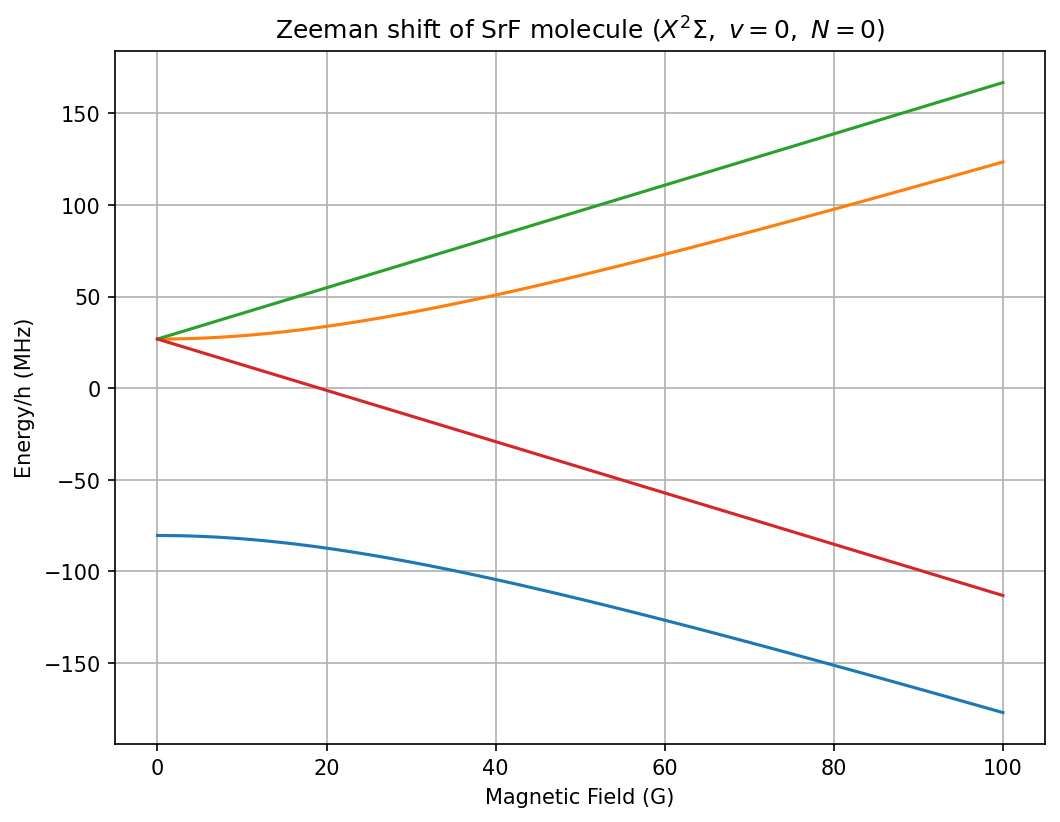

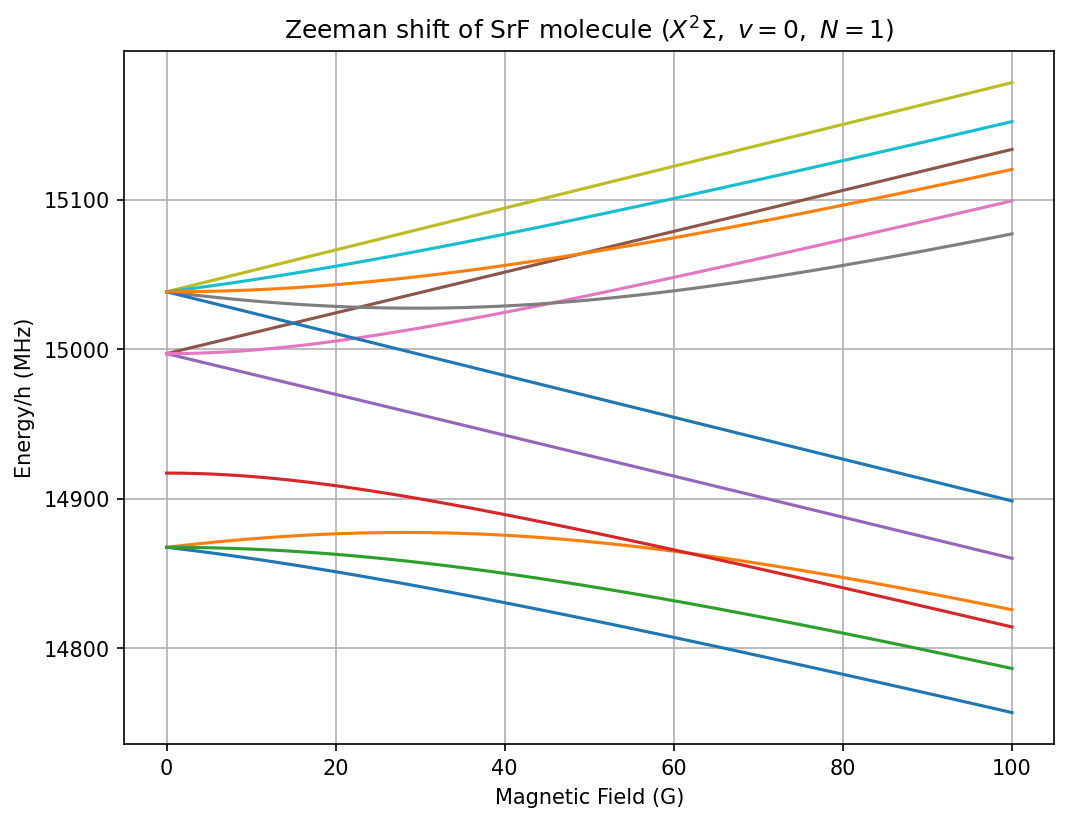

In [9]:
Nmax = 1 #compute hf energies from N=0 up to N=Nmax.
H0 = hyperfine_hamiltonian_no_field(Nmax, SrFConstants) # generate field-free hamiltonian. the dimension is (2*S+1)*(2*I+1)*(Nmax+1)^2.
Hz = Zeeman_hamiltonian(Nmax, SrFConstants, Bfield=np.array([0, 0, 1])) # generate Zeeman hamiltonian. B-field B = B\hat{z}.

print(H0.shape)

Bz_list = np.linspace(0, 100, 100) # range from 0 to 100 G B-field
energies_list = np.empty((len(Bz_list), H0.shape[0]), dtype=np.complex_) #for us, 100 x 16 2d array.
states_list = np.empty((len(Bz_list), H0.shape[0], H0.shape[0]), dtype=np.complex_) #for us, 100 x 16 x 16 3d array.

#diagonalize the combined field-free + zeeman hamiltonian to obtain eigenenergies and eigenstates.
for i, Bz in enumerate(Bz_list):
    H = H0 + Hz * Bz
    energies, states = eigh(H) # diagonalize matrix
    energies_list[i] = energies/1e6
    states_list[i] = states

energies_list, states_list = sort_eigenstates(energies_list, states_list)

#note that energies are defined relative to the "hf-free" transition energy of N=0 to N=1 being 14975.2277 MHz

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(Bz_list, np.real(energies_list[:, 0:4])) # plot N=0 states

plt.ylabel("Energy/h (MHz)")
plt.xlabel("Magnetic Field (G)")
plt.title("Zeeman shift of SrF molecule ($X^2\Sigma,\ v=0,\ N=0$)")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(Bz_list, np.real(energies_list[:, 4:16])) # plot N=1 states

plt.ylabel("Energy/h (MHz)")
plt.xlabel("Magnetic Field (G)")
plt.title("Zeeman shift of SrF molecule ($X^2\Sigma,\ v=0,\ N=1$)")
plt.grid()
plt.show()

Two tasks remain: 
1. Compute necessary B-field for splitting N=0, F=1 into distinct Zeeman sublevels (single quantum state.)
2. Compute necessary B-field to be applied to allow for a nonzero TDM from N=1, F=0 to N=0, F=0 (a better single quantum state and the one for MW shielding.) Also compute this TDM if possible.